**<h1>Hotel Analysis</h1>**

In this analysis, I began with an uneven and unstructured dataset containing various details about hotels. The data required significant preprocessing and transformation to make it suitable for analysis. I utilized PySpark, a powerful tool for handling large datasets, to efficiently manage and transform the data.

**<h3>Data Loading and Transformation</h3>**

**Loading Data:** The raw dataset, which had inconsistencies such as missing values, incorrect data entries, and inconsistent capitalization, was loaded into a PySpark DataFrame. PySpark's distributed computing capabilities allowed for handling this large and uneven dataset effectively.

In [7]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pyspark

In [9]:
from pyspark.sql import SparkSession

In [10]:
spark= SparkSession.builder.appName('Python').getOrCreate()

In [11]:
spark

In [12]:
df_pyspark=spark.read.csv('data.csv')

In [13]:
df_pyspark

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string]

In [14]:
df_pyspark= spark.read.csv('data.csv',header=True,inferSchema=True)

In [15]:
df_pyspark

DataFrame[address: string, city: string, state: string, country: string, hotel_rating: string, per_day_price: int, property_name: string, property_id: int, room_type: string, uniq_id: string, latitude: double, longitude: double, pageurl: string]

In [16]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [17]:
df_pyspark.printSchema()

root
 |-- address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- country: string (nullable = true)
 |-- hotel_rating: string (nullable = true)
 |-- per_day_price: integer (nullable = true)
 |-- property_name: string (nullable = true)
 |-- property_id: integer (nullable = true)
 |-- room_type: string (nullable = true)
 |-- uniq_id: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- pageurl: string (nullable = true)



In [18]:
df_pyspark.columns

['address',
 'city',
 'state',
 'country',
 'hotel_rating',
 'per_day_price',
 'property_name',
 'property_id',
 'room_type',
 'uniq_id',
 'latitude',
 'longitude',
 'pageurl']

In [19]:
df_pyspark.show()

+--------------------+-------------+----------------+-------+------------+-------------+--------------------+-----------+--------------------+--------------------+-----------+-----------+--------------------+
|             address|         city|           state|country|hotel_rating|per_day_price|       property_name|property_id|           room_type|             uniq_id|   latitude|  longitude|             pageurl|
+--------------------+-------------+----------------+-------+------------+-------------+--------------------+-----------+--------------------+--------------------+-----------+-----------+--------------------+
|Sunny Side. Chadi...|       Manāli|Himachal Pradesh|  India|5-star hotel|         9999|Manuallaya The Re...|     502590|Double Room with ...|e34224d860dde9ed6...|32.25472894|77.19280601|http://www.bookin...|
|New Delhi NCR NH ...|      Gurgaon|         Haryana|  India|5-star hotel|         8849|Hyatt Regency Gur...|     537294|           King Room|0e7e3ef3091c17d71...|2

**<h3>Data Cleaning:</h3>**

**Removing Null Values:** I identified and removed rows with null or missing values to ensure the integrity of the analysis. This step was crucial for avoiding skewed results due to incomplete data.

**Correcting Values:** Erroneous or inconsistent data entries were corrected. For example, incorrect or inconsistent hotel ratings were standardized to a uniform format.

**Letter Correction:** To maintain consistency, the text data was cleaned by capitalizing or formatting strings correctly, ensuring uniformity across columns such as hotel names, locations, and reviews.

In [20]:
df_pyspark= df_pyspark.na.drop(how='any',subset=['hotel_rating'])

In [21]:
df_pyspark= df_pyspark.na.drop()

In [22]:
df_pyspark.show()

+--------------------+-------------+----------------+-------+------------+-------------+--------------------+-----------+--------------------+--------------------+-----------+-----------+--------------------+
|             address|         city|           state|country|hotel_rating|per_day_price|       property_name|property_id|           room_type|             uniq_id|   latitude|  longitude|             pageurl|
+--------------------+-------------+----------------+-------+------------+-------------+--------------------+-----------+--------------------+--------------------+-----------+-----------+--------------------+
|Sunny Side. Chadi...|       Manāli|Himachal Pradesh|  India|5-star hotel|         9999|Manuallaya The Re...|     502590|Double Room with ...|e34224d860dde9ed6...|32.25472894|77.19280601|http://www.bookin...|
|New Delhi NCR NH ...|      Gurgaon|         Haryana|  India|5-star hotel|         8849|Hyatt Regency Gur...|     537294|           King Room|0e7e3ef3091c17d71...|2

In [23]:
df_pyspark.select(['hotel_rating', 'property_name']).show()

+------------+--------------------+
|hotel_rating|       property_name|
+------------+--------------------+
|5-star hotel|Manuallaya The Re...|
|5-star hotel|Hyatt Regency Gur...|
|5-star hotel|          The Quorum|
|5-star hotel|Mayfair Palm Beac...|
|5-star hotel|Renaissance Luckn...|
|5-star hotel|       Taj Bangalore|
|5-star hotel|    Rivatas By Ideal|
|5-star hotel|Crystal Sarovar P...|
|5-star hotel|   Palm Meadows Club|
|5-star hotel|Laurent & Benon S...|
|5-star hotel|Radisson Blu Hote...|
|5-star hotel|    The Tamara Coorg|
|5-star hotel|Hyatt Regency Gur...|
|5-star hotel|   Palm Meadows Club|
|5-star hotel| Srinivasa Residency|
|5-star hotel|The Ajit Bhawan P...|
|5-star hotel|DoubleTree Suites...|
|5-star hotel|     Grand Hyatt Goa|
|5-star hotel|   Fortune The Savoy|
|5-star hotel|Crystal Sarovar P...|
+------------+--------------------+
only showing top 20 rows



In [24]:
df_pyspark= df_pyspark.withColumnRenamed('hotel_rating','hotel_rating')

In [25]:
df_pyspark.show()

+--------------------+-------------+----------------+-------+------------+-------------+--------------------+-----------+--------------------+--------------------+-----------+-----------+--------------------+
|             address|         city|           state|country|hotel_rating|per_day_price|       property_name|property_id|           room_type|             uniq_id|   latitude|  longitude|             pageurl|
+--------------------+-------------+----------------+-------+------------+-------------+--------------------+-----------+--------------------+--------------------+-----------+-----------+--------------------+
|Sunny Side. Chadi...|       Manāli|Himachal Pradesh|  India|5-star hotel|         9999|Manuallaya The Re...|     502590|Double Room with ...|e34224d860dde9ed6...|32.25472894|77.19280601|http://www.bookin...|
|New Delhi NCR NH ...|      Gurgaon|         Haryana|  India|5-star hotel|         8849|Hyatt Regency Gur...|     537294|           King Room|0e7e3ef3091c17d71...|2

In [26]:
replace_dict = {"1 stars": "1-star hotel", "2 stars": "2-star hotel", "3 stars": "3-star hotel", "4 stars": "4-star hotel", "5 stars": "5-star hotel"}
df_pyspark = df_pyspark.replace(replace_dict, subset="hotel_rating")
df_pyspark.show()

+--------------------+-------------+----------------+-------+------------+-------------+--------------------+-----------+--------------------+--------------------+-----------+-----------+--------------------+
|             address|         city|           state|country|hotel_rating|per_day_price|       property_name|property_id|           room_type|             uniq_id|   latitude|  longitude|             pageurl|
+--------------------+-------------+----------------+-------+------------+-------------+--------------------+-----------+--------------------+--------------------+-----------+-----------+--------------------+
|Sunny Side. Chadi...|       Manāli|Himachal Pradesh|  India|5-star hotel|         9999|Manuallaya The Re...|     502590|Double Room with ...|e34224d860dde9ed6...|32.25472894|77.19280601|http://www.bookin...|
|New Delhi NCR NH ...|      Gurgaon|         Haryana|  India|5-star hotel|         8849|Hyatt Regency Gur...|     537294|           King Room|0e7e3ef3091c17d71...|2

In [27]:
df_pyspark.filter(df_pyspark['hotel_rating'] == '5-star hotel').show()

+--------------------+-------------+----------------+-------+------------+-------------+--------------------+-----------+--------------------+--------------------+-----------+-----------+--------------------+
|             address|         city|           state|country|hotel_rating|per_day_price|       property_name|property_id|           room_type|             uniq_id|   latitude|  longitude|             pageurl|
+--------------------+-------------+----------------+-------+------------+-------------+--------------------+-----------+--------------------+--------------------+-----------+-----------+--------------------+
|Sunny Side. Chadi...|       Manāli|Himachal Pradesh|  India|5-star hotel|         9999|Manuallaya The Re...|     502590|Double Room with ...|e34224d860dde9ed6...|32.25472894|77.19280601|http://www.bookin...|
|New Delhi NCR NH ...|      Gurgaon|         Haryana|  India|5-star hotel|         8849|Hyatt Regency Gur...|     537294|           King Room|0e7e3ef3091c17d71...|2

**Data Conversion:** After cleaning and transforming the data in PySpark, I converted the DataFrame into a Pandas DataFrame. This step enabled more straightforward manipulation and analysis of the data using the extensive libraries available in Python.

In [28]:
import pandas as pd

In [29]:
df_pandas = df_pyspark.toPandas()

In [30]:
df_pandas['city'] = df_pandas['city'].str.capitalize()

In [31]:
df_pandas

,address,city,state,country,hotel_rating,per_day_price,property_name,property_id,room_type,uniq_id,latitude,longitude,pageurl
0,Sunny Side. Chadiyari. 175131 Manāli. India – ...,Manāli,Himachal Pradesh,India,5-star hotel,9999,Manuallaya The Resort & Spa,502590,Double Room with Garden View,e34224d860dde9ed64122cf8a3aaf34f,32.254729,77.192806,http://www.booking.com/hotel/in/manuallaya-the...
1,New Delhi NCR NH 8 Sector 83. 122004 Gurgaon. ...,Gurgaon,Haryana,India,5-star hotel,8849,Hyatt Regency Gurgaon,537294,King Room,0e7e3ef3091c17d710b55380adb67296,28.392203,76.976513,http://www.booking.com/hotel/in/hyatt-regency-...
2,2257/1.B 1 Vinoba Road. Near Kala Mandir. 5700...,Mysore,Karnataka,India,5-star hotel,8929,The Quorum,546131,Executive Double or Twin Room,d24f2c2472bce1438f969f7a06ca3661,12.312035,76.640523,http://www.booking.com/hotel/in/the-quorum-mys...
3,Gopalpur-on-Sea.Dist. Ganjam. 761002 Gopālpur....,Gopālpur,Orissa,India,5-star hotel,8919,Mayfair Palm Beach Resort,497691,Executive Double Room,09422036dc3826d006114b022ab6eb87,19.255063,84.904388,http://www.booking.com/hotel/in/mayfair-palm-b...
4,Vipin Khand. 226010 Lucknow. India – Great loc...,Lucknow,Uttar Pradesh,India,5-star hotel,8909,Renaissance Lucknow Hotel,1488299,Deluxe Double or Twin Room with City View,84de4fd05284ed22c4335e5a7510f6ed,26.852332,80.973039,http://www.booking.com/hotel/in/renaissance-lu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,Near Pohari Chouraha Gwalior Guna By Pass Road...,Shivpurī,Madhya Pradesh,India,1-star hotel,397,Hotel P S Residency,1684573,Deluxe Double Room,4b064c1803a7dd0784dcd976f49a44e6,25.436004,77.644838,http://www.booking.com/hotel/in/p-s-residency....
2463,Maa Vaishno Complex.Idgah Bus Stand Road Road....,Agra,Uttar Pradesh,India,1-star hotel,396,Hotel Viren Plaza,557284,Deluxe Double Room with Fan,83e8bd52784daa0304de593faa445b6e,27.166590,77.996154,http://www.booking.com/hotel/in/viren-plaza.en...
2464,Raja Niwas. Shoghi. 171219 Shimla. India – Sho...,Shimla,Himachal Pradesh,India,1-star hotel,395,Vardaan Homestay,503067,Double Room,5e1b718ecfd081367a1d19a45ef833ae,31.044257,77.129688,http://www.booking.com/hotel/in/vardaan-homest...
2465,Hanuman Ghat. Out Side Chand Pole. 313001 Udai...,Udaipur,Rajasthan,India,1-star hotel,394,Panorama Guest House,499859,Basic Double Room,c614a3c55d0f27fe77c5f1aac83141bc,24.580146,73.679890,http://www.booking.com/hotel/in/panorama-guest...




**Sorting Data:** The hotel data was then sorted by the hotel_rating column in descending order. This sorting allowed for easy identification of the top-rated hotels, providing valuable insights into the best-performing hotels in the dataset.



In [32]:
df_pandas= df_pandas.sort_values(by='hotel_rating', ascending=False)

In [33]:
df_pandas.to_csv('data.csv', index=None)

**<h3>Data Visualization,</h3>**
To visualize the cleaned and sorted data, I employed Matplotlib and Seaborn, two popular data visualization libraries in Python:

**Matplotlib:** I used Matplotlib to create basic histogram to visualize the distribution of hotel ratings and the number of hotels under that rating.

**Seaborn:** Seaborn was leveraged for more complex visualizations, such as scatterplot to uncover deeper insights into the dataset. For example, I visualized the relationship between hotel ratings with respect to latitude and longitude across different regions.

In [34]:
!pip install matplotlib seaborn

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

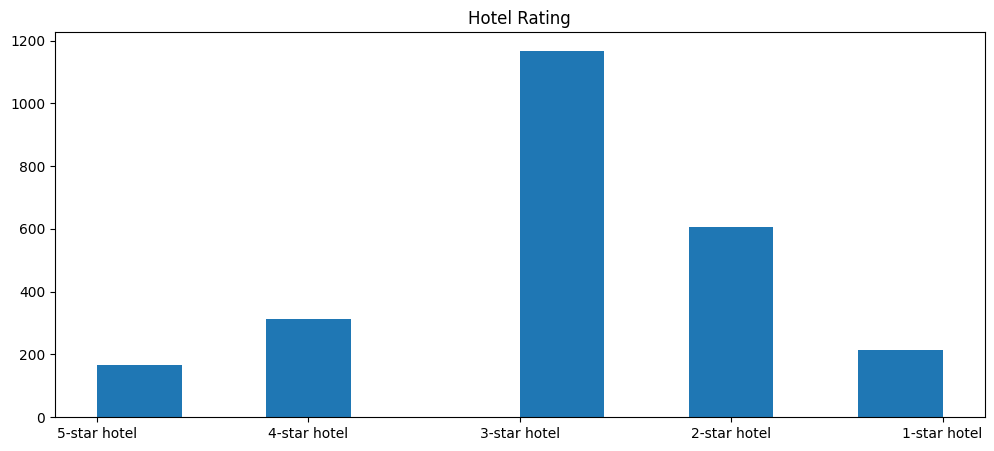

In [40]:
plt.figure(figsize=(12, 5))
plt.title("Hotel Rating")
plt.hist(df_pandas.hotel_rating);

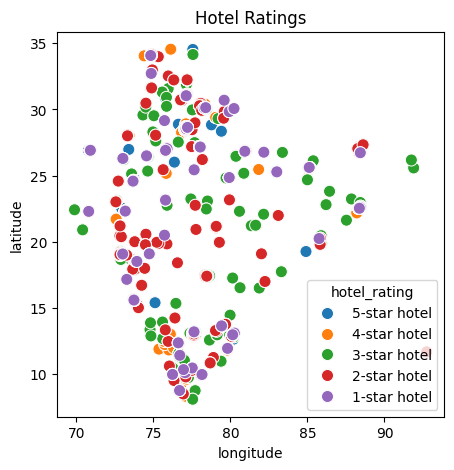

In [41]:
plt.figure(figsize=(5, 5))
plt.title('Hotel Ratings')
sns.scatterplot(x=df_pandas.longitude, 
                y=df_pandas.latitude, 
                hue=df_pandas.hotel_rating,
                s=75);

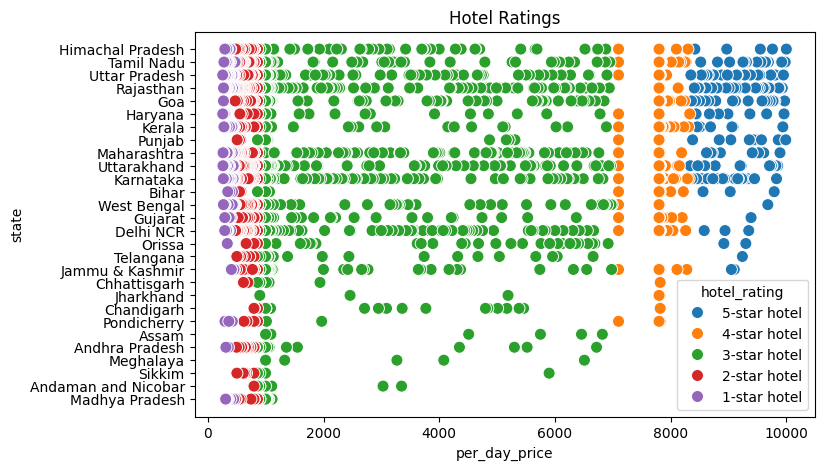

In [42]:
plt.figure(figsize=(8, 5))
plt.title('Hotel Ratings')
sns.scatterplot(x=df_pandas.per_day_price,
                y=df_pandas.state,
                hue=df_pandas.hotel_rating,
                s=75);

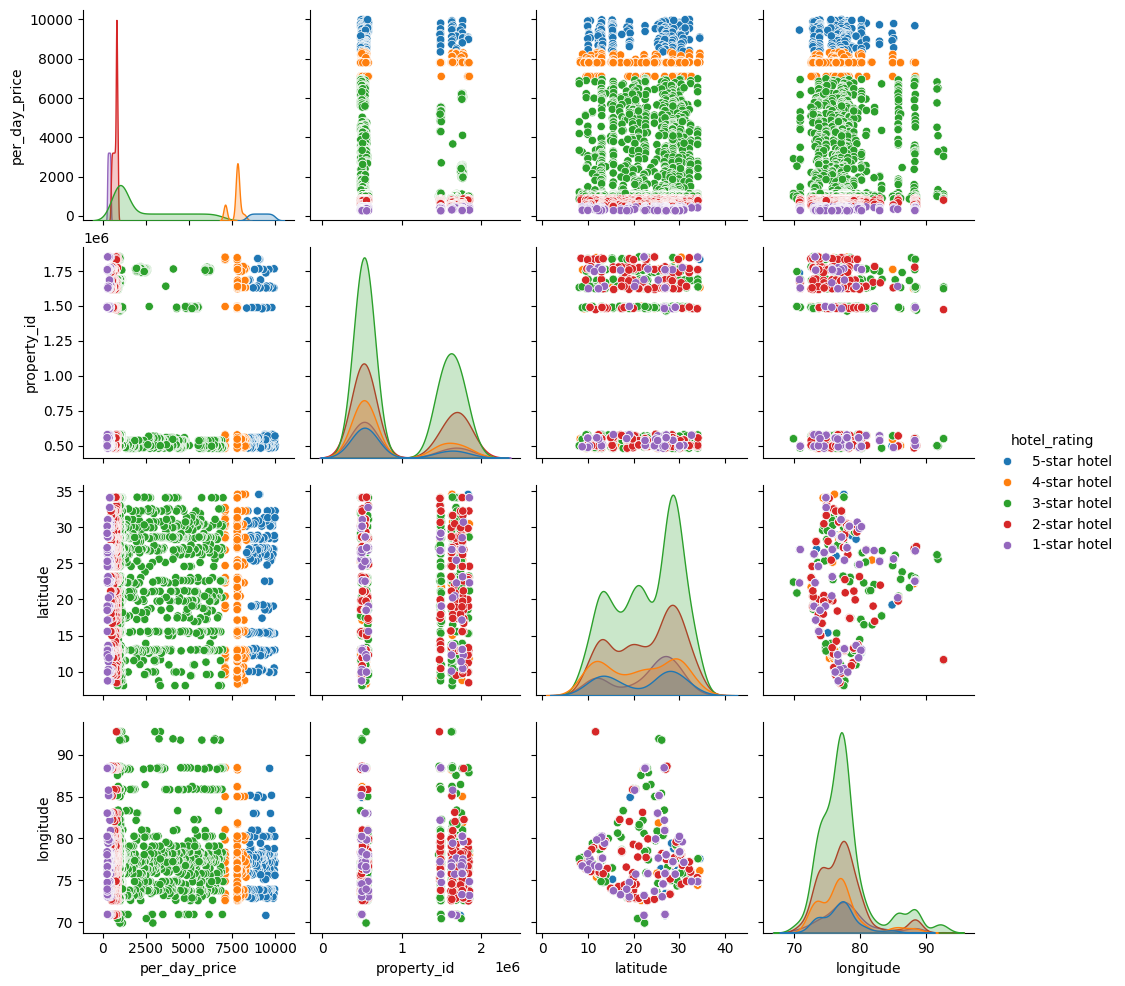

In [43]:
sns.pairplot(df_pandas, hue='hotel_rating');

**<h3>Conclusion</h3>**

The process of transforming and analyzing the hotel dataset, from loading it in PySpark to visualizing it using Matplotlib and Seaborn, allowed for a comprehensive understanding of the hotel landscape. The clean and structured data enabled meaningful analysis, and the visualizations provided actionable insights that could be used for decision-making in hotel management and customer satisfaction strategies.

**<h2> SQL Query </h2>**
Writing SQL Query to fetch data.

In [47]:
df_pyspark.createOrReplaceTempView("Hotels")

result_df = spark.sql("""
            SELECT * 
            FROM Hotels
            WHERE per_day_price == 9999
            """) ## <= WRITE YOUR SQL QUERY HERE.

result_df.show()

+--------------------+------+----------------+-------+------------+-------------+--------------------+-----------+--------------------+--------------------+-----------+-----------+--------------------+
|             address|  city|           state|country|hotel_rating|per_day_price|       property_name|property_id|           room_type|             uniq_id|   latitude|  longitude|             pageurl|
+--------------------+------+----------------+-------+------------+-------------+--------------------+-----------+--------------------+--------------------+-----------+-----------+--------------------+
|Sunny Side. Chadi...|Manāli|Himachal Pradesh|  India|5-star hotel|         9999|Manuallaya The Re...|     502590|Double Room with ...|e34224d860dde9ed6...|32.25472894|77.19280601|http://www.bookin...|
+--------------------+------+----------------+-------+------------+-------------+--------------------+-----------+--------------------+--------------------+-----------+-----------+------------